# Impact of MLB team salary on Win Ratio

I was intruiged by this visualisation on FiveThirtyEight and wanted to try to recreate it in Python using Matplotlib

https://fivethirtyeight.com/features/how-your-favorite-baseball-team-blows-its-money/

https://fivethirtyeight.com/features/dont-be-fooled-by-baseballs-small-budget-success-stories/

This diagram, at its core, is a scatter plot of standardized salary for each team against their win/loss percentage for the years 1985 - 2015. 
* Salaries were standardized by calculating the mean league spending for each year and then calculating how many standard deviations each team's total salaries were away from that mean. 
* each season is one dot in the figure
* the colored line in each chart represents the regression/best fit showing the overall trend for that team

This diagram is intended to investigate whether higher spending does indeed lead to better performance 

The salary data used in this analysis was taken from https://www.kaggle.com/open-source-sports/baseball-databank#Salaries.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

## 1. Get and cleanup salary data to use in chart

In [2]:
# first load salary data (taken from https://www.kaggle.com/open-source-sports/baseball-databank#Salaries.csv)
df=pd.read_csv('./data/Salaries.csv')

In [3]:
df.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


This dataset includes each individual player's salary but we just want to get the total Salary costs for each team /year

In [4]:
# so let's create a new dataset with the total salary
df=df[['yearID','teamID','lgID','salary']].groupby(['yearID','teamID','lgID']).sum().reset_index()
df.head()

,yearID,teamID,lgID,salary
0,1985,ATL,NL,14807000
1,1985,BAL,AL,11560712
2,1985,BOS,AL,10897560
3,1985,CAL,AL,14427894
4,1985,CHA,AL,9846178


Now we need to calculate how many standard deviations each team's Salary spending is away from the league average for that year

Let's start by building up this calculation for one team for one year

In [5]:
# get the mean salary for 1985
avg_salary = round(df[(df['yearID']==1985)]['salary'].mean(),2)
print(f'Average team salary in 1985 was ${avg_salary}')

Average team salary in 1985 was $10075565.23


In [6]:
# get std dev for salaries in 1985
salary_dev = round(df[(df['yearID']==1985)]['salary'].std(),2)
print(f'Salary standard deviation in 1985 was ${salary_dev}')

Salary standard deviation in 1985 was $2470845.43


In [7]:
# preview Baltimore's record for 1985
df.iloc[1,:]

yearID        1985
teamID         BAL
lgID            AL
salary    11560712
Name: 1, dtype: object

In [8]:
# how many std devs form mean is htat?
std_devs_from_mean = (df.iloc[1,:]['salary'] -avg_salary )/salary_dev
print(f"Baltimore's total Salary in 1985 was ${df.iloc[1,:]['salary']}, which is {round(std_devs_from_mean,2)} standard deviations away from the League average in that year")
print('That makes sense... Baltimores salary total was above league average')

Baltimore's total Salary in 1985 was $11560712, which is 0.6 standard deviations away from the League average in that year
That makes sense... Baltimores salary total was above league average


Ok, so now let's add a new column to the dataframe with this information for each team.  I defined a function to calculate this value and then called it for each row in the dataframe using a lambda expression.  I had a bit of trouble getting it to accept two values from the dataframe (year and salary) but eventually resolved it by adding an axis=1 argument (thanks to https://kaijento.github.io/2017/04/22/pandas-create-new-column-sum/ for the hint)

Note: This likely is not the most efficient way to calculate this value and extend the dataframe, but my focus was on generating data quickly to get to the visualization.

In [9]:
''' This function calculates how many standard deviations a teams salary lies from the mean for a given year and returns that value'''
def calculate_std_salary(df,year,salary):
    #print(year)
    #return ((df[(df['yearID']==year)]['salary'].mean())-salary)/(df[(df['yearID']==year)]['salary'].std()) 
    return (salary-(df[(df['yearID']==year)]['salary'].mean()))/(df[(df['yearID']==year)]['salary'].std()) 

In [10]:
df['StandardizedSalary'] = df.apply(lambda row: calculate_std_salary(df, row.yearID, row.salary), axis=1 )
df.head()

,yearID,teamID,lgID,salary,StandardizedSalary
0,1985,ATL,NL,14807000,1.914905
1,1985,BAL,AL,11560712,0.601068
2,1985,BOS,AL,10897560,0.332678
3,1985,CAL,AL,14427894,1.761474
4,1985,CHA,AL,9846178,-0.092838


Sanity check these computed values for one year

In [11]:
# sanity check these computed values for one year
print(f"Mean salary for 2012 was {df[(df['yearID']==2012)]['salary'].mean()}")
#print(f"BOS salary for 2012 was {df[(df['yearID']==2012 & df['teamID]=='BOS)]['salary']} which standardized to ")
df[(df['yearID']==2012)] #


Mean salary for 2012 was 97758039.73333333


,yearID,teamID,lgID,salary,StandardizedSalary
768,2012,ARI,NL,73804833,-0.650592
769,2012,ATL,NL,82829942,-0.405462
770,2012,BAL,AL,77353999,-0.554194
771,2012,BOS,AL,173186617,2.048713
772,2012,CHA,AL,96919500,-0.022776
773,2012,CHN,NL,88197033,-0.259686
774,2012,CIN,NL,82203616,-0.422473
775,2012,CLE,AL,78430300,-0.524960
776,2012,COL,NL,78069571,-0.534758
777,2012,DET,AL,132300000,0.938193


## 2.  Now need to get and cleanup winning percentage for each team /year 

Import Teams.csv file, also from Kaggle referenced above site

In [12]:
df_teams=pd.read_csv('./data/Teams.csv')
df_teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


This dataset has a lot of extraneous information for our purposes, so let's get rid of all the columns except the ones of interest
* G: Games play
* W: Games won
* L: Games lost

In [13]:
df_teams = df_teams[['yearID','lgID', 'teamID','G','W','L']] # first limit cols
df_teams.head()

,yearID,lgID,teamID,G,W,L
0,1871,NaN,BS1,31,20,10
1,1871,NaN,CH1,28,19,9
2,1871,NaN,CL1,29,10,19
3,1871,NaN,FW1,19,7,12
4,1871,NaN,NY2,33,16,17


In [14]:
# in addition, this dataset goes back to 1871, so let's filter for years > 1985 to match our Salary data
df_teams=df_teams[(df_teams['yearID'] >= 1985)].reset_index().drop('index',axis=1)
df_teams.head()

,yearID,lgID,teamID,G,W,L
0,1985,NL,ATL,162,66,96
1,1985,AL,BAL,161,83,78
2,1985,AL,BOS,163,81,81
3,1985,AL,CAL,162,90,72
4,1985,AL,CHA,163,85,77


In [15]:
# now calculate winning percentage for each team/year and add as a new column
df_teams['winning_perc'] = df_teams['W']/df_teams['G']
df_teams.head()

,yearID,lgID,teamID,G,W,L,winning_perc
0,1985,NL,ATL,162,66,96,0.407407
1,1985,AL,BAL,161,83,78,0.515528
2,1985,AL,BOS,163,81,81,0.496933
3,1985,AL,CAL,162,90,72,0.555556
4,1985,AL,CHA,163,85,77,0.521472


Now let's merge the two datasets together into one dataframe that we can use for our visualization

In [16]:
# merge datasets together
df_merged = df.merge(df_teams, on=['yearID','lgID','teamID'])
df_merged.head()

,yearID,teamID,lgID,salary,StandardizedSalary,G,W,L,winning_perc
0,1985,ATL,NL,14807000,1.914905,162,66,96,0.407407
1,1985,BAL,AL,11560712,0.601068,161,83,78,0.515528
2,1985,BOS,AL,10897560,0.332678,163,81,81,0.496933
3,1985,CAL,AL,14427894,1.761474,162,90,72,0.555556
4,1985,CHA,AL,9846178,-0.092838,163,85,77,0.521472


## 3. Starting small with our visualization -- build up our plot for one team

To start with, let's build up a plot for just one team... and, of course, we'll start with the Blue Jays!

Let's create a small dataframe with just Blue Jays info to play around with

In [17]:
# start with a basic scatterplot for ONE team.. Blue Jays
blue_jays = df_merged[(df_merged['teamID']== 'TOR')]
blue_jays


,yearID,teamID,lgID,salary,StandardizedSalary,G,W,L,winning_perc
25,1985,TOR,AL,8812550,-0.511167,161,99,62,0.614907
51,1986,TOR,AL,12611047,0.241763,163,86,76,0.527607
77,1987,TOR,AL,10479501,-0.001083,162,96,66,0.592593
103,1988,TOR,AL,12241225,0.202391,162,87,75,0.537037
129,1989,TOR,AL,16261666,0.676879,162,89,73,0.549383
155,1990,TOR,AL,17756834,0.181472,162,86,76,0.530864
181,1991,TOR,AL,19902417,-0.533219,162,91,71,0.561728
207,1992,TOR,AL,44788666,1.508778,162,96,66,0.592593
235,1993,TOR,AL,47279166,1.632731,162,95,67,0.586420
263,1994,TOR,AL,43433668,1.207288,115,55,60,0.478261


Start with a simple scatter plot and we can build up the desired look

Text(0,1,'Winning Percentage')

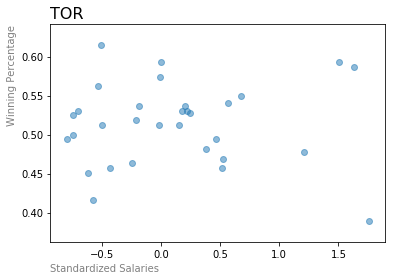

In [18]:
plt.scatter(x=blue_jays['StandardizedSalary'], y=blue_jays['winning_perc'],alpha=0.5)
plt.title('TOR', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') 
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')


Not bad... now let's add in the crosshairs and try to center graph 

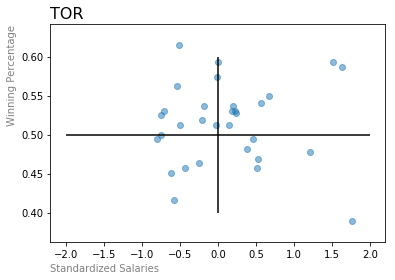

In [19]:
plt.scatter(x=blue_jays['StandardizedSalary'], y=blue_jays['winning_perc'],alpha=0.5)
plt.title('TOR', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') 
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')

#plot a horizontal line from x=-2 to 2 at y=0.5
plt.hlines(0.5,-2, 2) 
# plot a vertical line from Y=.4-.6 at X=0
plt.vlines(0,.4,.6)


This created our crosshairs and, as a nice side effect, also centered the graph for us at 0, 0.5

Now let's get rid of the border.  To do this, we need access to the axes object, so we have to slightly change how we invoke the figure

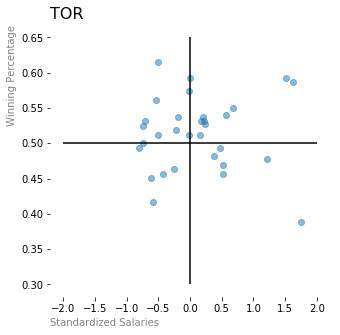

In [20]:
# change way we invoke plot so can manipulate the axis
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x=blue_jays['StandardizedSalary'], y=blue_jays['winning_perc'],alpha=0.5)
plt.title('TOR', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') 
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')
# create cross hairs 
plt.hlines(0.5,-2, 2)
plt.vlines(0,.3,.65)

# Now we can remove the top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

Looking good... how about some gridlines?

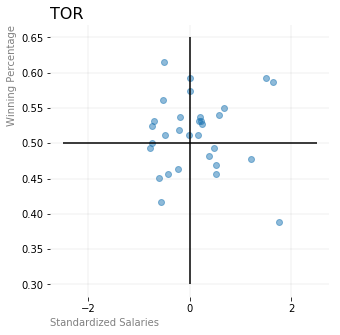

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))
#ax.scatter(x, y)
ax.scatter(x=blue_jays['StandardizedSalary'], y=blue_jays['winning_perc'],alpha=0.5)
plt.title('TOR', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') 
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')
# create cross hairs - note this also centered plot for us
plt.hlines(0.5,-2.5, 2.5)
plt.vlines(0,.3,.65)

# reduce ticks on x axis so it's cleaner
plt.xticks([-2,0,2])

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add in gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

Finally, let's add in a simple regression line

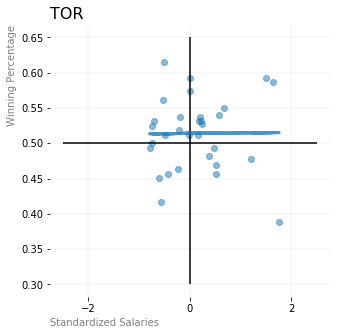

In [22]:
fig, ax = plt.subplots(figsize=(5, 5))

# add in Line of Best fit for Blue Jays
# we'll use polyfit
z = np.polyfit(blue_jays['StandardizedSalary'], blue_jays['winning_perc'], 1)
p = np.poly1d(z)
# b- = blue solid line
# linewidth =3: adjust linewidth to get a thicker line
# c='#1f77b4': adjust blue color to match python default blue for Blue Jays
plt.plot(blue_jays['StandardizedSalary'], p(blue_jays['StandardizedSalary']), 'b-',alpha=.8,c='#1f77b4',linewidth =3)


ax.scatter(x=blue_jays['StandardizedSalary'], y=blue_jays['winning_perc'],alpha=0.5 )
plt.title('TOR', position = (0,1), ha = 'left', fontsize=16)
plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey')
plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')
# create cross hairs - note this also centered plot for us
plt.hlines(0.5,-2.5, 2.5)
plt.vlines(0,.3,.65)

# reduce ticks on x axis so it's cleaner
plt.xticks([-2,0,2])

#removing top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# add in gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

### 4. Let's turn this into a function we can call to create a plot for a specific team



In [23]:
def plot_team(team_df,team_color='#1f77b4'):
    ''' Generate a plot for the specified team
    team_df: a filtered dataframe that only contains data for the desired team
    team_color: color to use when generating plot.  defaults to blue (as for Blue Jays above)
    '''
    fig, ax = plt.subplots(figsize=(5, 5))

    # add in Line of Best fit for Team
    z = np.polyfit(team_df['StandardizedSalary'], team_df['winning_perc'], 1)
    p = np.poly1d(z)
    # b- = blue solid line
    # adjust linewidth to get a thicker line
    # adjust blue color to match python default blue for Blue Jays
    plt.plot(team_df['StandardizedSalary'], p(team_df['StandardizedSalary']), 'b-',alpha=.8,c=team_color,linewidth =3)


    ax.scatter(x=team_df['StandardizedSalary'], y=team_df['winning_perc'],alpha=0.5,c=team_color )
    plt.title(f"{team_df['teamID'].values[0]}",  loc = 'center', fontsize=16)
    plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey')
    plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')
    # create cross hairs 
    plt.hlines(0.5,-2.5, 2.5)
    plt.vlines(0,.3,.65)

    # reduce ticks on x axis so it's cleaner
    plt.xticks([-2,0,2])

    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # add in gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

Ok, let's test this for a few teams...

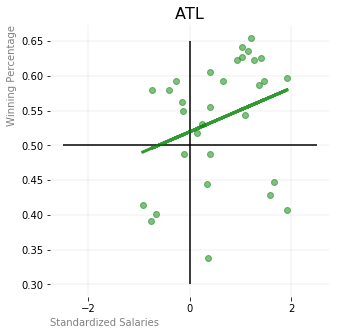

In [24]:
plot_team(df_merged[(df_merged['teamID']=='ATL')],'g')

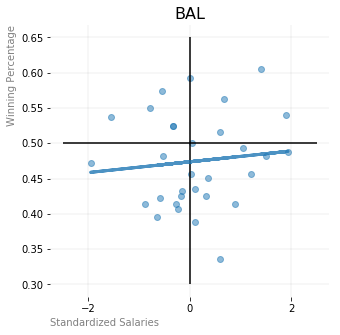

In [25]:
plot_team(df_merged[(df_merged['teamID']=='BAL')])


### 5.  Now try calling this function in a loop to generate plots for all the teams in the American League East

First let's create a dictionary with the team names and a colour to use for plotting that team

In [26]:
al_east_team_dict={
    'BAL':'#FF6F1C', 
    'BOS':'#FFB627',
    'NYA':'#223843', 
    'TOR':'#1f77b4', 
    'FLO':'#FFCAD4'
}
al_east_team_dict

{'BAL': '#FF6F1C',
 'BOS': '#FFB627',
 'NYA': '#223843',
 'TOR': '#1f77b4',
 'FLO': '#FFCAD4'}

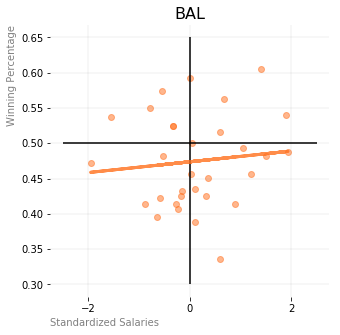

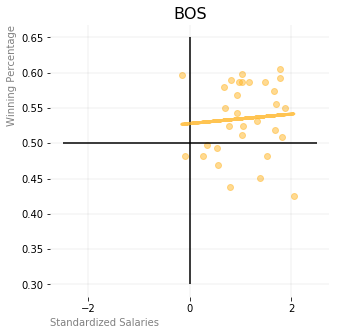

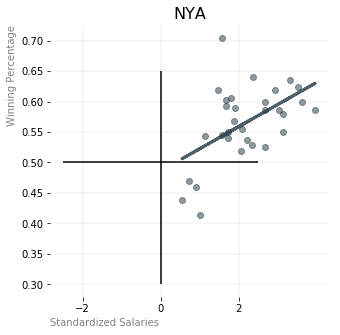

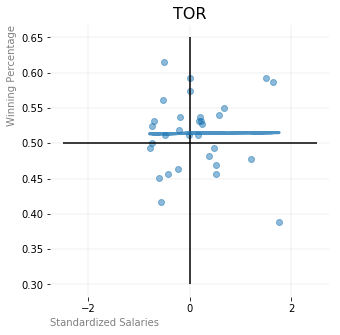

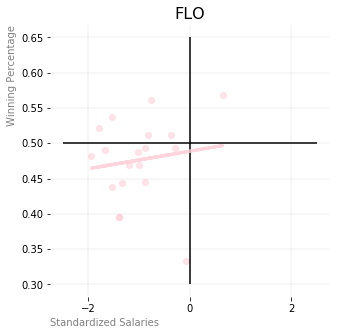

In [27]:
for team,color in al_east_team_dict.items():
    plot_team(df_merged[(df_merged['teamID']==team)],color)

### 6. Now let's plot these in a row

We're going to have to change our function slightly to accommodate this

Outside of the function, I instantiated the plot with the desired dimensions - 1 row with 5 columns for the 5 AL East Teams
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)

The ax object is an array with each array defining one subplot.  These arrays can be passed into to the plot_team_row() function to "fill in" that plot with one team

In [28]:
def plot_team_row(team_df, ax,team_color='#1f77b4'):
    '''Creates a subplot for one team
    team_df: a filtered dataframe that only contains data for the desired team
    ax: the axes object to use for this plot.  Lets us target a specific subplot
    team_color: color to use when generating plot.  defaults to blue (as for Blue Jays above)
    '''

    # add in Line of Best fit for team
    z = np.polyfit(team_df['StandardizedSalary'], team_df['winning_perc'], 1)
    p = np.poly1d(z)
    # b- = blue solid line
    # adjust linewidth to get a thicker line
    # adjust blue color to match python default blue for team
    ax.plot(team_df['StandardizedSalary'], p(team_df['StandardizedSalary']), 'b-',alpha=.8,c=team_color,linewidth =3)
    

    ax.scatter(x=team_df['StandardizedSalary'], y=team_df['winning_perc'],alpha=0.5,c=team_color )
    # note change in how title is called
    ax.set_title(f"{team_df['teamID'].values[0]}")
 
    # suppress x/y labels so we can put one label on overall plot 
   # plt.xlabel("Standardized Salaries", position = (0,0), ha = 'left', color = 'grey') # getting error
   # plt.ylabel('Winning Percentage', position = (0, 1), ha = 'right', color = 'grey')

    # create cross hairs - note this also centered plot for us
    ax.hlines(0.5,-2.5, 2.5)
    ax.vlines(0,.3,.65)

    # reduce ticks on x axis so it's cleaner
    plt.xticks([-2,0,2])

    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # add in gridlines
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

[Text(0,0.5,'Winning Percentage'), Text(0.5,0,'Standardized Salaries')]

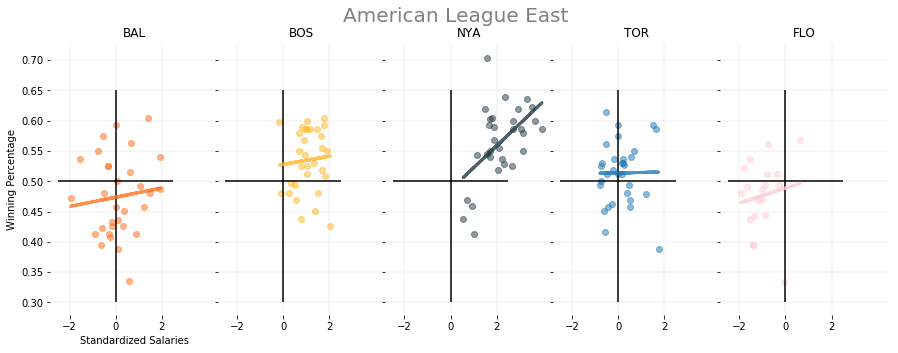

In [29]:
# create a plot that's 1 row and 5 columns wide
# sharex=True, sharey=True: these plots will share the same x and y axis
fig, ax = plt.subplots(nrows=1, ncols=5,figsize=(15,5),sharex=True, sharey=True)
# set an overall title for the plot
fig.suptitle('American League East', ha='center',color = 'grey',fontsize=20,va='top',) 
# help the subplots fit better
fig.subplots_adjust(hspace = .5, wspace=.001)

pos=0 # determines which axes object we will pass into the function to be filled by the team's plot
for team,color in al_east_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[pos],color)
    pos=pos+1

# force label to appear on first plot rather than the last plot
ax[0].set(xlabel='Standardized Salaries', ylabel='Winning Percentage')

We can see that there is a general trend for higher salaries to lead to a higher winning percentage

* This is particularly strong for the Yankees
* Toronto, however, seems to have fairly flat results no matter what the total salary is


### 7. Finally, create the full chart for the whole league

In [30]:
# will need dictionaries for all leagues
al_central_team_dict={
    'CLE':'#FF6F1C', 
    'MIN':'#FFB627',
    'DET':'#223843', 
    'CHA':'#1f77b4', 
    'KCA':'#FFCAD4'
}
al_west_team_dict={
    'HOU':'#FF6F1C', 
    'OAK':'#FFB627',
    'SEA':'#223843', 
    'LAN':'#1f77b4', 
    'TEX':'#FFCAD4'
}

nl_central_team_dict={
    'ML4':'#FF6F1C', 
    'CHN':'#FFB627',
    'SLN':'#223843', 
    'PIT':'#1f77b4', 
    'CIN':'#FFCAD4'
}
nl_west_team_dict={
    'LAN':'#FF6F1C', 
    'COL':'#FFB627',
    'ARI':'#223843', 
    'SFN':'#1f77b4', 
    'SDN':'#FFCAD4'
}
nl_east_team_dict={
    'ATL':'#FF6F1C', 
    'WAS':'#FFB627',
    'PHI':'#223843', 
    'NYN':'#1f77b4', 
    'MIA':'#FFCAD4'
}

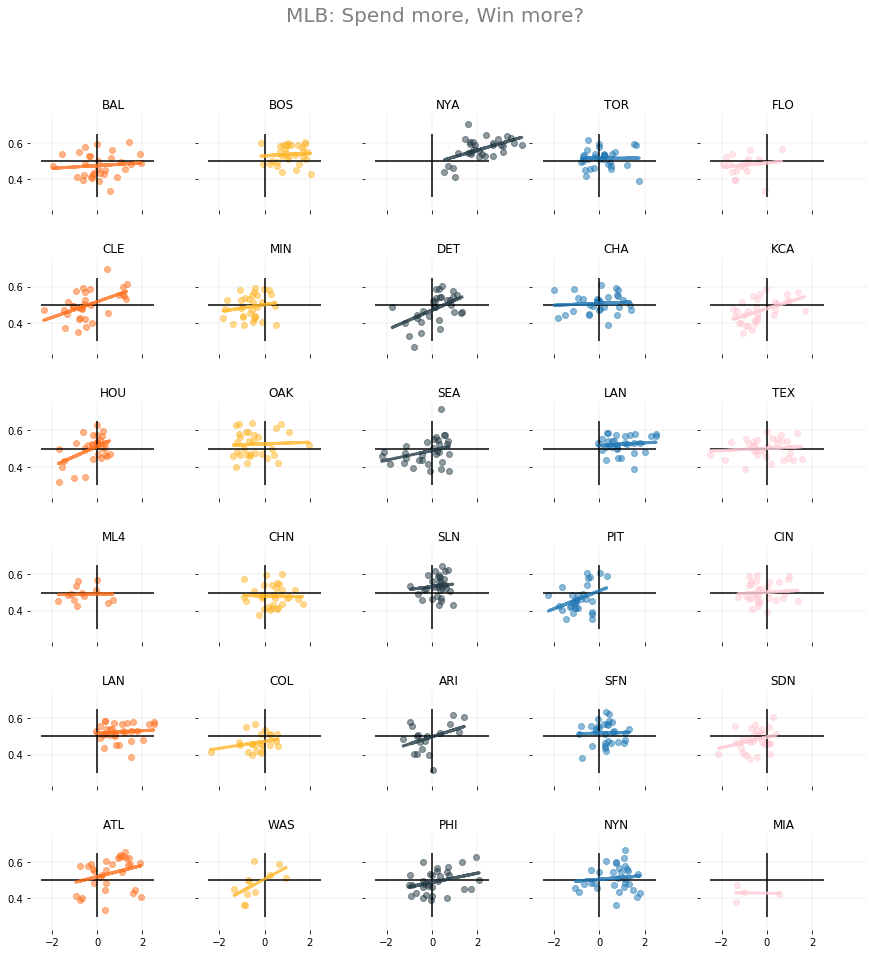

In [31]:
# create a plot that's 6 rows and 5 columns wide
# sharex=True, sharey=True: these plots will share the same x and y axis
fig, ax = plt.subplots(nrows=6, ncols=5,figsize=(15,15),sharex=True, sharey=True)
# set an overall title for the plot
fig.suptitle('MLB: Spend more, Win more?', ha='center',color = 'grey',fontsize=20,va='top',) 
# help the subplots fit better
fig.subplots_adjust(hspace = .5, wspace=.001)

#ax[0][pos]:  the axes object contains a numpy array for each row with 5 sub plots
# so pass in the appropriate row to the function
pos=0 # determines which axes object we will pass into the function to be filled by the team's plot
for team,color in al_east_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[0][pos],color)
    pos=pos+1
pos=0    
for team,color in al_central_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[1][pos],color)
    pos=pos+1
pos=0 
for team,color in al_west_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[2][pos],color)
    pos=pos+1
pos=0 
for team,color in nl_central_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[3][pos],color)
    pos=pos+1
pos=0 
for team,color in nl_west_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[4][pos],color)
    pos=pos+1
pos=0 
for team,color in nl_east_team_dict.items():
    plot_team_row(df_merged[(df_merged['teamID']==team)], ax[5][pos],color)
    pos=pos+1
# force label to appear on first plot rather than the last plot
#ax[0].set(xlabel='Standardized Salaries', ylabel='Winning Percentage')